# Finding correlation between features

## Data Set Information:

# We use the following representation to collect the dataset
<p> We use the following representation to collect the dataset </p>
<p> age - age </p>
<p> bp - blood pressure</p>
<p> sg - specific gravity Urine specific gravity is a laboratory test that shows the concentration of all chemical particles in the urine</p>
<p> al - albumin</p>
<p> su - sugar</p>
<p> rbc - red blood cells</p>
<p> pc - pus cell</p>
<p> pcc - pus cell clumps</p>
<p> ba - bacteria</p>
<p> bgr - blood glucose random</p>
<p> bu - blood urea</p>
<p> sc - serum creatinine</p>
<p> sod - sodium</p>
<p> pot - potassium</p>
<p> hemo - hemoglobin</p>
<p> pcv - packed cell volume</p>
<p> wc - white blood cell count</p>
<p> rc - red blood cell count</p>
<p> htn - hypertension</p>
<p> dm - diabetes mellitus</p>
<p> cad - coronary artery disease</p>
<p> appet - appetite</p>
<p> pe - pedal edema</p>
<p> ane - anemia</p>
<p> class - class</p>

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
from sklearn import metrics

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore') 

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

# Database loading and pre-processing

In [3]:
#Database loading and pre-processing

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

#initialise variable with dataset name
dataset_name = ".\chronic_kidney_disease.csv"

#error-handling to prevent abnormal termination of code
try:
    #import and load weather dataset into pandas dataframe
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(chronic_kidney_disease_dataframe)
    #Missing value imputation
    #replace ? to nan values 
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.


In [4]:
chronic_kidney_disease_dataframe.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,0,0,1,1,1,1,ckd
1,7,50,1.02,4,0,0,0,1,1,NaN,18,0.8,NaN,NaN,11.3,38,6000,0.0,1,1,1,1,1,1,ckd
2,62,80,1.01,2,3,0,0,1,1,423,53,1.8,NaN,NaN,9.6,31,7500,0.0,1,0,1,0,1,0,ckd
3,48,70,1.005,4,0,0,1,0,1,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,1,1,0,0,0,ckd
4,51,80,1.01,2,0,0,0,1,1,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,1,1,1,1,1,1,ckd


In [5]:
chronic_kidney_disease_dataframe.shape

(400, 25)

In [6]:
# Datatypes:
chronic_kidney_disease_dataframe.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class     object
dtype: object

## Replacing categorial with null value

In [7]:
chronic_kidney_disease_dataframe["class"] = [1 if i == "ckd" else 0 for i in chronic_kidney_disease_dataframe["class"]]

In [8]:
chronic_kidney_disease_dataframe.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,0,0,1,1,121,36,1.2,NaN,NaN,15.4,44,7800,5.2,0,0,1,1,1,1,1
1,7,50,1.02,4,0,0,0,1,1,NaN,18,0.8,NaN,NaN,11.3,38,6000,0.0,1,1,1,1,1,1,1
2,62,80,1.01,2,3,0,0,1,1,423,53,1.8,NaN,NaN,9.6,31,7500,0.0,1,0,1,0,1,0,1
3,48,70,1.005,4,0,0,1,0,1,117,56,3.8,111,2.5,11.2,32,6700,3.9,0,1,1,0,0,0,1
4,51,80,1.01,2,0,0,0,1,1,106,26,1.4,NaN,NaN,11.6,35,7300,4.6,1,1,1,1,1,1,1


In [9]:
chronic_kidney_disease_dataframe.dtypes

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv        int64
wbcc       int64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

## Converting all the data types to float

In [10]:
# taking the length of the column and converting the each column to float
colLength = (len(chronic_kidney_disease_dataframe.axes[1]))

# for storing the position of each column
count=0;

for i in chronic_kidney_disease_dataframe:
    count += 1
    # the last column of the data set is label so when we reach last column just break the loop
    if(count==25):
        break
    
    # converting each column to float data type
    
    chronic_kidney_disease_dataframe[i] = chronic_kidney_disease_dataframe[i].astype('float64')

In [11]:
chronic_kidney_disease_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

In [12]:
# Description:
chronic_kidney_disease_dataframe.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,400.000000,400.000000,400.000000,400.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.117500,0.190000,0.885000,0.935000,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,31.982500,6178.500000,3.16575,0.627500,0.645000,0.905000,0.792500,0.807500,0.847500,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.322418,0.392792,0.319421,0.246835,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,16.962799,4490.489839,2.36621,0.484076,0.479113,0.293582,0.406024,0.394757,0.359955,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,26.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,37.000000,6900.000000,4.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,44.000000,9400.000000,5.10000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking for the null values

In [13]:
# Cheaking Missing (NaN) Values:
chronic_kidney_disease_dataframe.isnull().sum().sort_values(ascending=False)

pot      88
sod      87
hemo     52
su       49
sg       47
al       46
bgr      44
bu       19
sc       17
bp       12
age       9
ba        0
pcc       0
pc        0
rbc       0
pcv       0
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
class     0
dtype: int64

## handling null values

In [14]:
chronic_kidney_disease_dataframe.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [15]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

## Replacing the null value with the median

In [16]:
for feature in features:
    chronic_kidney_disease_dataframe[feature] = chronic_kidney_disease_dataframe[feature].fillna(chronic_kidney_disease_dataframe[feature].median())

In [17]:
chronic_kidney_disease_dataframe.isnull().any().sum()

0

## Performing Correlation and plotting heatmap

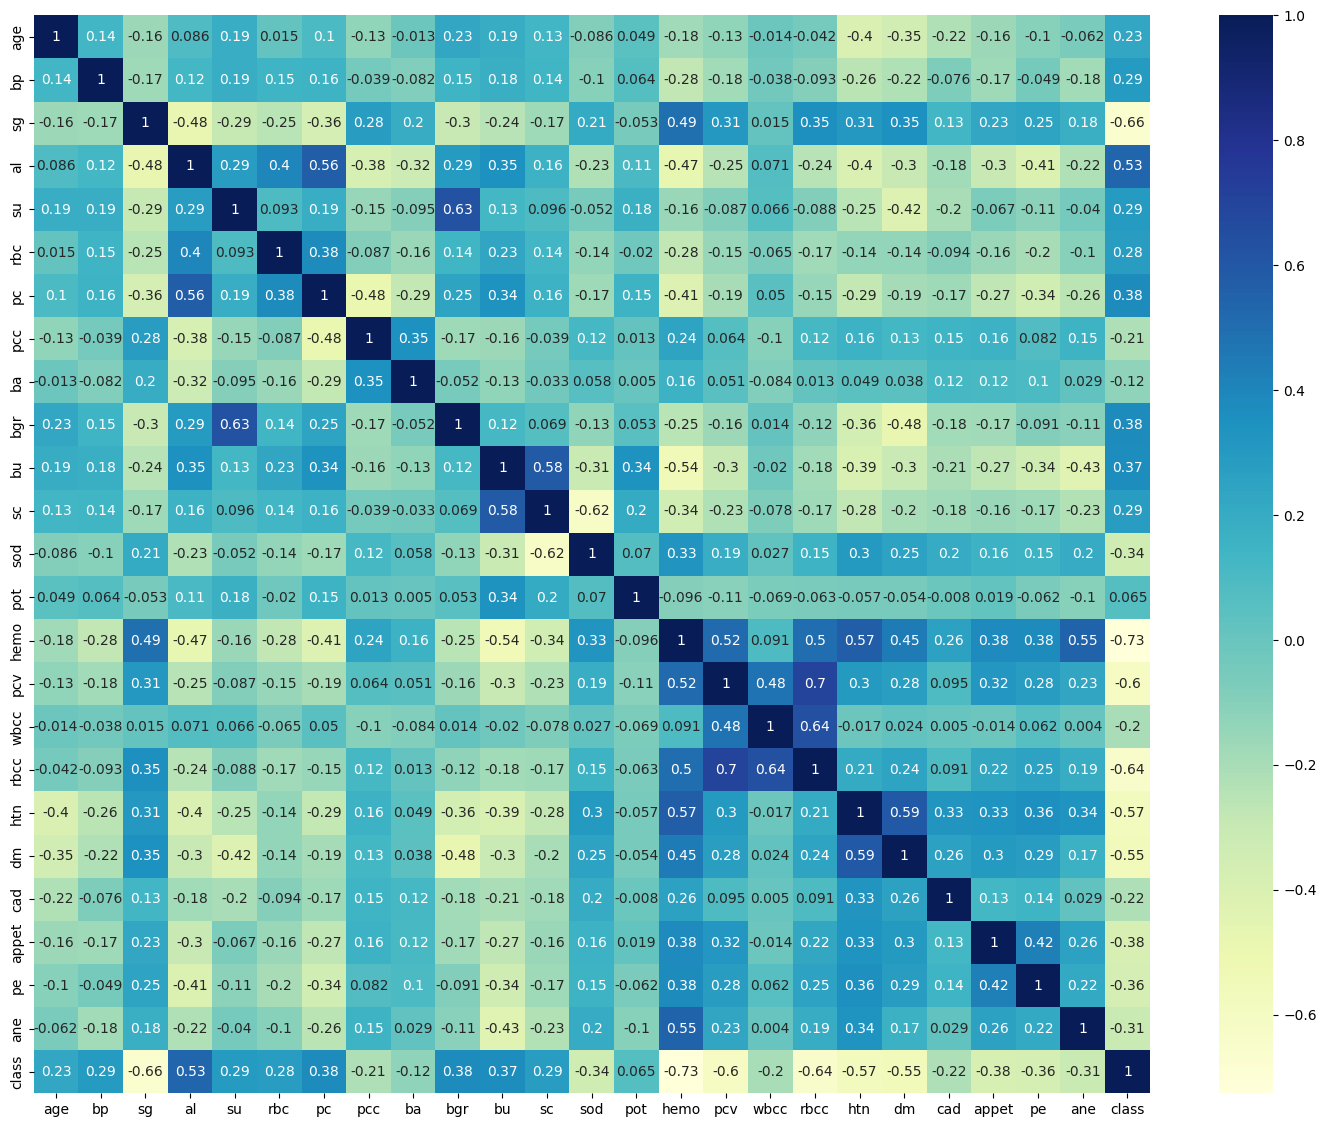

In [18]:
# plotting of corellated 
plt.figure(figsize=(18,14))
sns.heatmap(chronic_kidney_disease_dataframe.corr().round(3), annot=True, cmap='YlGnBu')
plt.show()

In [19]:
chronic_kidney_disease_dataframe.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,1.0,1.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,0.0,0.0,1.0,1.0,1.0,1.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,1.0,1.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0.0,1.0,1.0,0.0,0.0,0.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1.0,1.0,1.0,1.0,1.0,1.0,1


<AxesSubplot: xlabel='class', ylabel='count'>

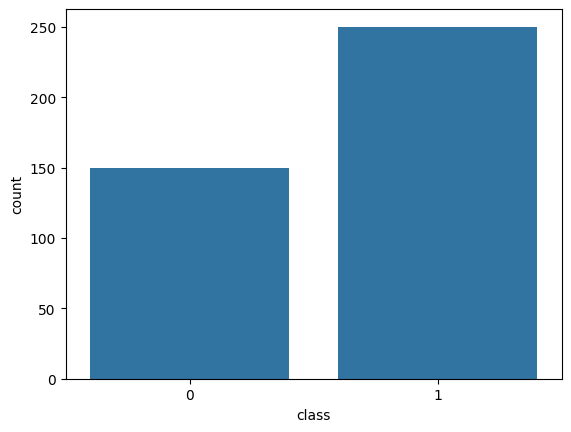

In [20]:
# Target class:
sns.countplot(chronic_kidney_disease_dataframe, x= "class")

In [21]:
# Independent and Dependent Feature:
X = chronic_kidney_disease_dataframe.iloc[:, :-1]
y = chronic_kidney_disease_dataframe.iloc[:, -1]

In [22]:
X

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,1.0,1.0,121.0,36.0,1.2,138.0,4.4,15.4,44.0,7800.0,5.2,0.0,0.0,1.0,1.0,1.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,1.0,1.0,121.0,18.0,0.8,138.0,4.4,11.3,38.0,6000.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,1.0,1.0,423.0,53.0,1.8,138.0,4.4,9.6,31.0,7500.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,0.0,1.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,0.0,1.0,1.0,0.0,0.0,0.0
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,1.0,1.0,106.0,26.0,1.4,138.0,4.4,11.6,35.0,7300.0,4.6,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,1.0,1.0,140.0,49.0,0.5,150.0,4.9,15.7,47.0,6700.0,4.9,1.0,1.0,1.0,1.0,1.0,1.0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,75.0,31.0,1.2,141.0,3.5,16.5,54.0,7800.0,6.2,1.0,1.0,1.0,1.0,1.0,1.0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,1.0,1.0,100.0,26.0,0.6,137.0,4.4,15.8,49.0,6600.0,5.4,1.0,1.0,1.0,1.0,1.0,1.0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,1.0,1.0,114.0,50.0,1.0,135.0,4.9,14.2,51.0,7200.0,5.9,1.0,1.0,1.0,1.0,1.0,1.0


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: int64

## Plotting graph based on the correlation feature

pcv      0.127102
dm       0.125355
sg       0.120524
htn      0.114840
rbcc     0.101348
hemo     0.092370
al       0.072407
pc       0.035740
appet    0.031832
sc       0.024812
pe       0.018298
wbcc     0.017562
rbc      0.016061
ane      0.015386
bp       0.015257
bgr      0.014854
bu       0.011945
su       0.011920
sod      0.008958
age      0.008730
pot      0.008165
cad      0.004754
pcc      0.001470
ba       0.000306
dtype: float64


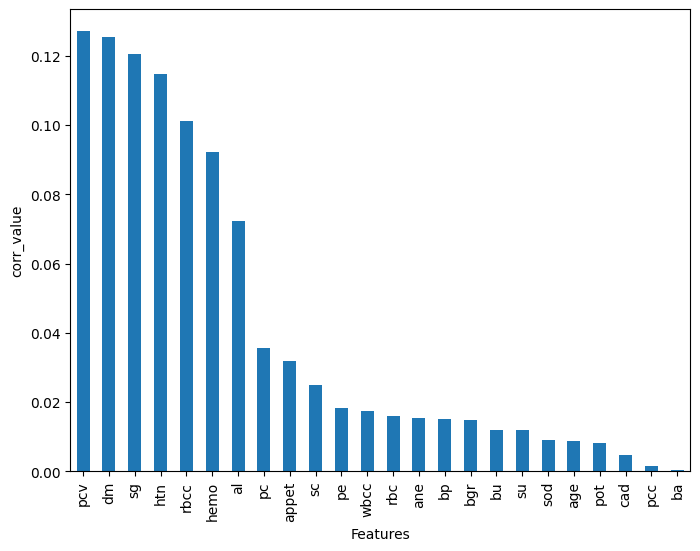

In [24]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='bar',xlabel="Features",ylabel="corr_value")
print(ranked_features.sort_values(ascending=False))
plt.show()